In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv('uncleaned_dataset.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [3]:
predictors = df.loc[:, df.columns != 'Target']
target = df['Target']

/var/folders/3b/2s6k_n693fz2sn_hlv78l67w0000gn/T/ipykernel_34875/1251825186.py:29: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/aml/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


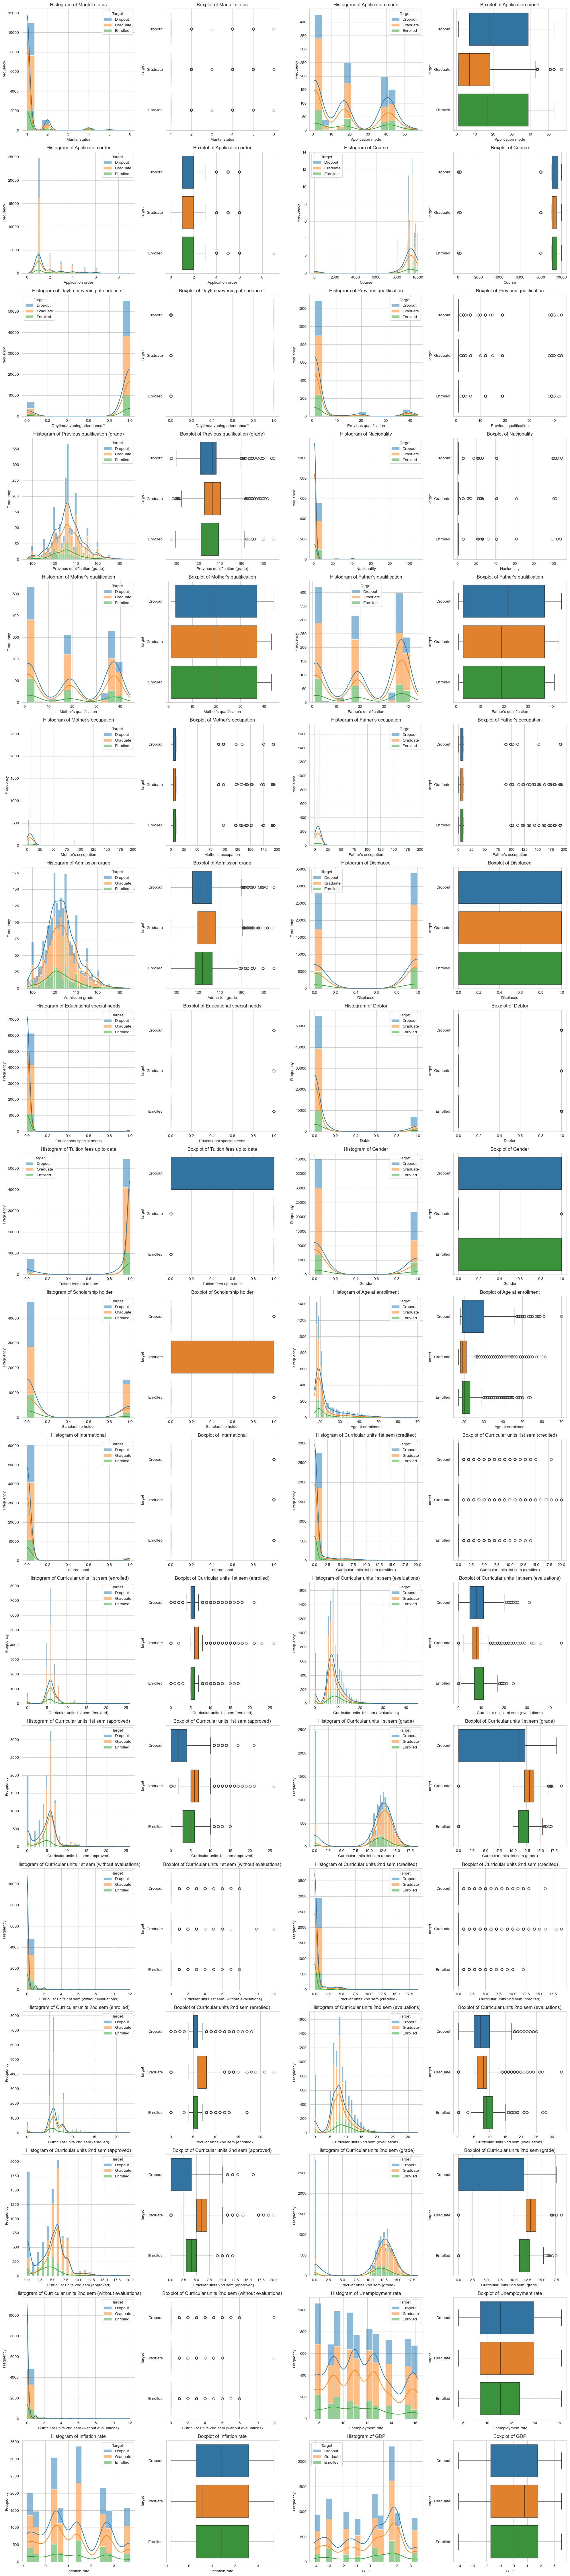

In [4]:
import math

# Define the number of columns and grid size
num_features = len(predictors.columns)
plots_per_row = 4
rows = math.ceil(num_features * 2 / plots_per_row)  # Each feature gets 2 plots (hist + boxplot)

fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, rows * 5))
axes = axes.flatten()

# Generate plots
for i, col in enumerate(predictors.columns):
    # Histogram (plot 1 for this feature)
    sns.histplot(
        data=predictors, x=col, stat="frequency", hue=target, multiple='stack',
        fill=True, common_norm=False, kde=True,
        linewidth=0.5, ax=axes[2 * i]
    )
    axes[2 * i].set_title(f"Histogram of {col}")

    # Boxplot (plot 2 for this feature)
    sns.boxplot(x=predictors[col], y=target, dodge=False, hue=target, ax=axes[2 * i + 1])
    axes[2 * i + 1].set_title(f"Boxplot of {col}")

# Remove unused subplots
for i in range(2 * num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

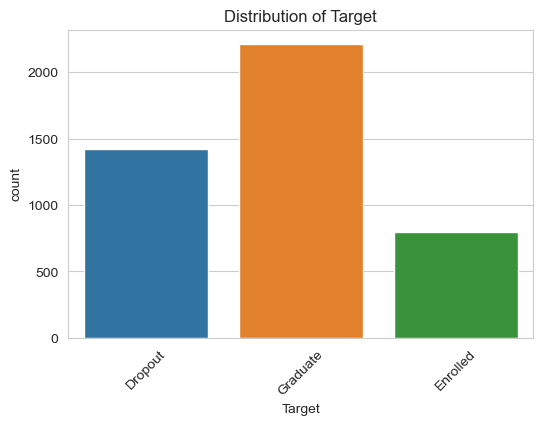

In [5]:
# Count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Target')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

### **Normality Test using Shapiro-Wilk**

This code performs the **Shapiro-Wilk test** to evaluate the normality of each numerical feature in the dataset. The Shapiro-Wilk test checks whether a feature's distribution significantly deviates from a normal distribution.

**Normality Assessment**:

-   If the p-value is less than **0.05** (common threshold), the feature is **not normally distributed**.
-   Otherwise, the feature is considered **normally distributed**.

#### Purpose:

This analysis helps identify which features are **normally distributed**, which is essential for choosing appropriate preprocessing steps (e.g., scaling methods) or statistical models that assume normality.


In [6]:
from scipy.stats import shapiro
from tabulate import tabulate

headers = ["Feature", "p-value", 'Normal (p < 0.05)']
rows = []

for col in predictors.columns:
  stat, p = shapiro(predictors[col])
  rows.append([col, p, p > 0.05 and 'Yes' or 'No'])

print(tabulate(rows, headers, tablefmt='fancy_grid', stralign='right'))

╒════════════════════════════════════════════════╤═════════════╤═════════════════════╕
│                                        Feature │     p-value │   Normal (p < 0.05) │
╞════════════════════════════════════════════════╪═════════════╪═════════════════════╡
│                                 Marital status │ 1.11304e-83 │                  No │
├────────────────────────────────────────────────┼─────────────┼─────────────────────┤
│                               Application mode │ 3.48958e-58 │                  No │
├────────────────────────────────────────────────┼─────────────┼─────────────────────┤
│                              Application order │ 1.37863e-71 │                  No │
├────────────────────────────────────────────────┼─────────────┼─────────────────────┤
│                                         Course │ 2.02693e-81 │                  No │
├────────────────────────────────────────────────┼─────────────┼─────────────────────┤
│                     Daytime/evening atten

### **Comparing Scaling Methods: MinMaxScaler vs. RobustScaler**

This code evaluates the performance of two different scaling methods, **MinMaxScaler** and **RobustScaler**, on a **Random Forest Classifier** using 5-fold cross-validation. The goal is to determine which scaling method results in better model performance for the given dataset.

#### Steps:

2. **MinMax Scaling**:

    - Scales the data to a fixed range, typically [0, 1].
    - The scaled data (`X_minmax`) is used to train a `RandomForestClassifier`.
    - Cross-validation scores (`scores_minmax`) are calculated and averaged.

3. **Robust Scaling**:

    - Scales data using the median and interquartile range (IQR), making it robust to outliers.
    - The scaled data (`X_robust`) is also evaluated using cross-validation, and the average score is stored in `scores_robust`.

4. **Performance Comparison**:
    - The mean cross-validation scores for both scalers are printed.
    - The scaler with the higher mean score is identified as the "best scaler."

#### Purpose:

This comparison helps you choose the most suitable scaling method for your dataset and model. By selecting the scaler that maximizes model performance, you ensure the best preprocessing pipeline for your analysis.


In [7]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# MinMax Scaled Data
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(predictors)
scores_minmax = cross_val_score(RandomForestClassifier(), X_minmax, target, cv=5)

# Robust Scaled Data
scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(predictors)
scores_robust = cross_val_score(RandomForestClassifier(), X_robust, target, cv=5)

print("MinMaxScaler Performance:", scores_minmax.mean())
print("RobustScaler Performance:", scores_robust.mean())

norm_preds = pd.DataFrame(X_minmax if scores_minmax.mean() > scores_robust.mean() else X_robust, columns=predictors.columns)
print(f"Best Scaler: {'MinMaxScaler' if scores_minmax.mean() > scores_robust.mean() else 'RobustScaler'}")


MinMaxScaler Performance: 0.7737329038525449
RobustScaler Performance: 0.7787036326916685
Best Scaler: RobustScaler


In [8]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode Categorical Features
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[['Target']])
target_classes = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(df[['Target']].columns))

df_encoded = pd.concat([norm_preds, target_classes], axis=1)
df_encoded.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,0.0,0.000000,4.0,-19.250531,0.0,0.0,-0.740000,0.0,0.000000,-0.205882,...,-2.0,-1.25,-4.722581,0.0,-0.066667,0.000000,0.406877,1.0,0.0,0.0
1,0.0,-0.052632,0.0,0.033970,0.0,0.0,1.793333,0.0,-0.514286,-0.470588,...,-0.5,0.25,0.567742,0.0,0.622222,-0.739130,0.134670,0.0,0.0,1.0
2,0.0,-0.421053,4.0,-0.356688,0.0,0.0,-0.740000,0.0,0.514286,0.529412,...,-2.0,-1.25,-4.722581,0.0,-0.066667,0.000000,0.406877,1.0,0.0,0.0
3,0.0,0.000000,1.0,1.135881,0.0,0.0,-0.740000,0.0,0.542857,0.529412,...,0.5,0.00,0.077419,0.0,-0.377778,-0.956522,-0.985673,0.0,0.0,1.0
4,1.0,0.578947,0.0,-2.598726,-1.0,0.0,-2.206667,0.0,0.514286,0.558824,...,-0.5,0.25,0.309677,0.0,0.622222,-0.739130,0.134670,0.0,0.0,1.0


### Correlation Analysis Between Predictors and Target Classes

This code computes and visualizes the Pearson correlation between the predictors and the one-hot encoded target classes. The analysis is split into several steps:

1. **Compute Correlations**:

    - Pearson correlation coefficients are calculated for each predictor-target class pair.
    - Correlation values are stored in a matrix.

2. **Heatmap Visualization**:

    - A heatmap is generated to visualize the strength and direction of correlations.
    - Colors represent positive (red) and negative (blue) correlations, with white indicating weak or no correlation.

3. **Categorize Correlations**:

    - Correlations are divided into three categories:
        - **Positively Correlated**: Coefficients ≥ 0.1
        - **Negatively Correlated**: Coefficients ≤ -0.1
        - **Non-Correlated**: Coefficients between -0.1 and 0.1

4. **Tabular Summary**:
    - A detailed table summarizes the predictors that are positively, negatively, or non-correlated with each target class.

#### Output:

-   **Heatmap**: Provides a visual overview of correlations.
-   **Table**: Lists positively, negatively, and non-correlated predictors for each target class.

#### Use Cases:

-   **Feature Selection**: Identify predictors that have meaningful relationships with target classes.
-   **Data Understanding**: Gain insights into the relationships within your dataset.
-   **Multicollinearity Detection**: Detect redundant predictors with similar correlations.


/opt/anaconda3/envs/aml/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/envs/aml/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


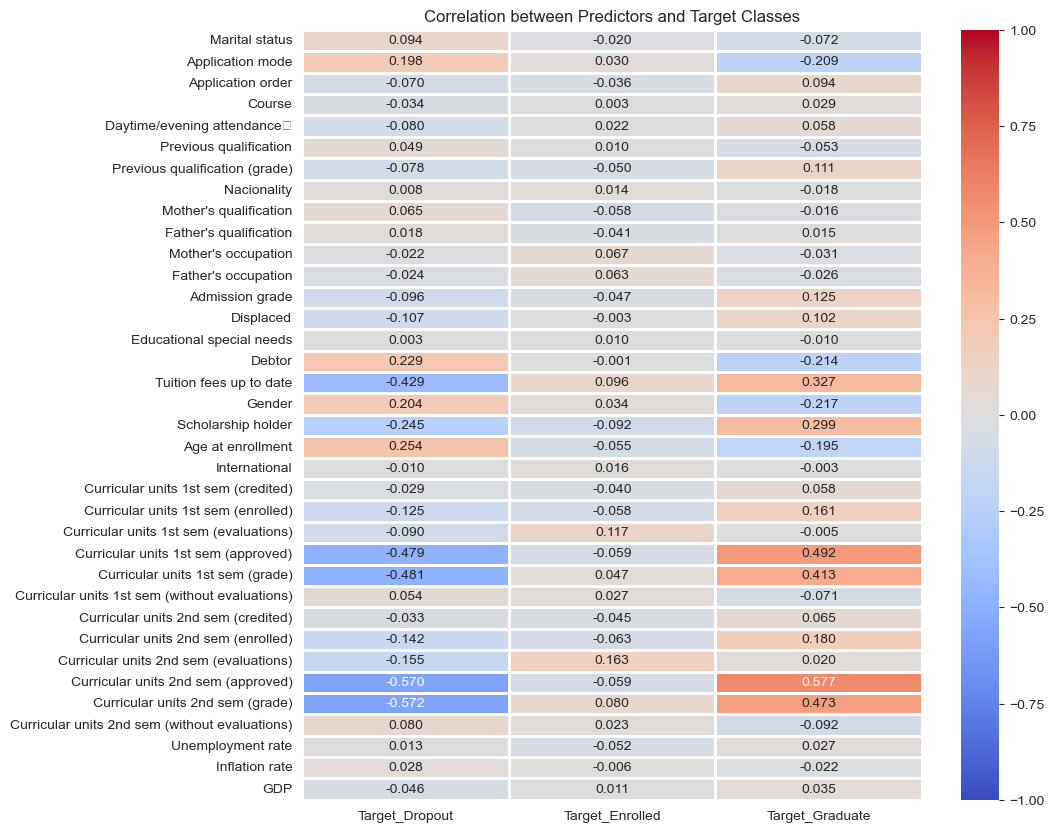

╒═════════════════╤════════════════════════════════════════╤════════════════════════════════════════╤════════════════════════════════════════════════╕
│  Target Class   │    Positively Correlated Predictors    │    Negatively Correlated Predictors    │           Non-Correlated Predictors            │
╞═════════════════╪════════════════════════════════════════╪════════════════════════════════════════╪════════════════════════════════════════════════╡
│ Target_Dropout  │            Application mode            │               Displaced                │                 Marital status                 │
│                 │                 Debtor                 │        Tuition fees up to date         │               Application order                │
│                 │                 Gender                 │           Scholarship holder           │                     Course                     │
│                 │           Age at enrollment            │  Curricular units 1st sem (enroll

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Create an empty DataFrame to store correlations
correlations = pd.DataFrame(index=predictors.columns.values, columns=target_classes.columns.values)

# Step 1: Compute correlations (predictor ~ target_classes)
for row, category_name in enumerate(target_classes.columns):
    for col, predictor_name in enumerate(predictors.columns):
        correlations.at[predictor_name, category_name] = predictors[predictor_name].corr(target_classes[category_name])

# Step 2: Convert the correlation values to float
correlations = correlations.astype(np.float64)

# Step 3: Create heatmap of correlations
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, annot=True, linewidths=1, fmt=".3f", cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
plt.title("Correlation between Predictors and Target Classes")
plt.show()

# Step 4: Identify positive, negative, and non-correlated predictors
positive_correlations = correlations[correlations > 0]
negative_correlations = correlations[correlations < 0]

# Helper function to format correlation display
def display_correlations(c):
    return "\n".join(map(lambda x: x.strip(), c.index.values)) if len(c.index.values) > 0 else "N/A"

# Step 5: Prepare the table of correlations
table = []
headers = ['Target Class', 'Positively Correlated Predictors', 'Negatively Correlated Predictors', 'Non-Correlated Predictors']

for category in correlations.columns:
    # Get all correlations for the current target category
    category_corr = correlations[category]
    positive_corr = category_corr[category_corr >= 0.1].dropna() # Positive correlations (>= 0.1)
    negative_corr = category_corr[category_corr <= -0.1].dropna() # Negative correlations (<= -0.1)
    no_corr = category_corr[~category_corr.isin(positive_corr) & ~category_corr.isin(negative_corr)].dropna() # Non-correlated (neither positive nor negative)

    table.append([category, display_correlations(positive_corr), display_correlations(negative_corr), display_correlations(no_corr)])

# Step 6: Display the table of correlations
print(tabulate(table, headers, tablefmt='fancy_grid', stralign='center'))

Top Features by Mutual Information:
                                           Feature  Mutual Information
30             Curricular units 2nd sem (approved)            0.310207
31                Curricular units 2nd sem (grade)            0.239324
24             Curricular units 1st sem (approved)            0.233439
25                Curricular units 1st sem (grade)            0.184882
16                         Tuition fees up to date            0.100460
29          Curricular units 2nd sem (evaluations)            0.096761
23          Curricular units 1st sem (evaluations)            0.075691
19                               Age at enrollment            0.065516
3                                           Course            0.053425
22             Curricular units 1st sem (enrolled)            0.052744
1                                 Application mode            0.046571
6                   Previous qualification (grade)            0.044584
28             Curricular units 2nd sem (

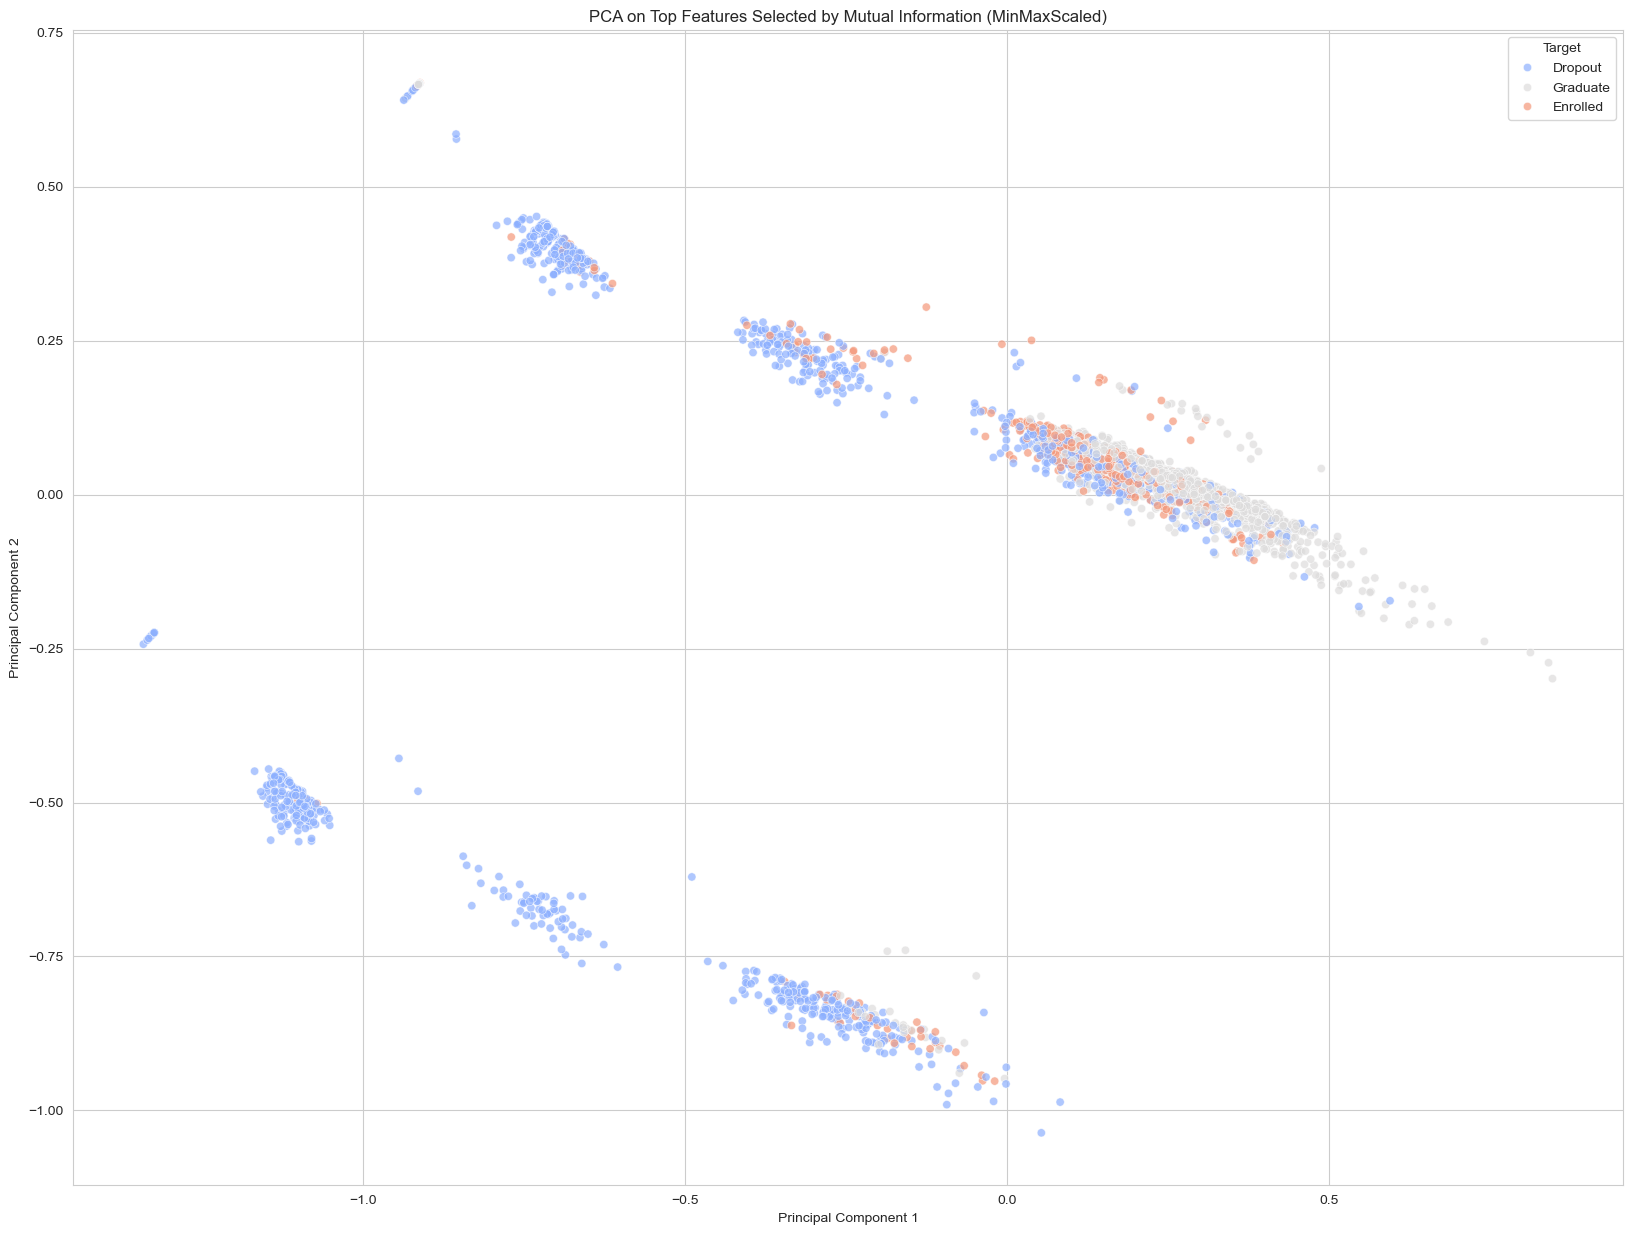

In [10]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Mutual Information Scores
mi_scores = mutual_info_classif(predictors, target, random_state=42)

# Create a DataFrame to rank features by mutual information
mi_scores_df = pd.DataFrame({
    'Feature': predictors.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

print("Top Features by Mutual Information:")
print(mi_scores_df)

# Step 2: Select Top Features
# Keep the top N features (e.g., top 10)
top_features = mi_scores_df['Feature'].head(10).values
selected_predictors = predictors[top_features]

# Step 3: Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(selected_predictors)

# Step 4: Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Target'] = target

# Step 5: Visualize PCA Results
plt.figure(figsize=(20, 15))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', palette='coolwarm', alpha=0.7)
plt.title('PCA on Top Features Selected by Mutual Information (MinMaxScaled)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.show()
